# ICE-5 Machine learning with image features

# GitHub Link:
#### https://github.com/nehabaddam/Feature_Engineering

## (Tutorial) Image Gradients
The difference in value between neighboring pixels is called an image gradient.<br>
We'll learn how to compute the image gradients with the following codes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, color, exposure
import cv2

In [2]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())

In [3]:
### Compute the horizontal gradient using the centered 1D filter.
### This is equivalent to replacing each non-border pixel with the
### difference between its right and left neighbors. The leftmost
### and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [4]:
### Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

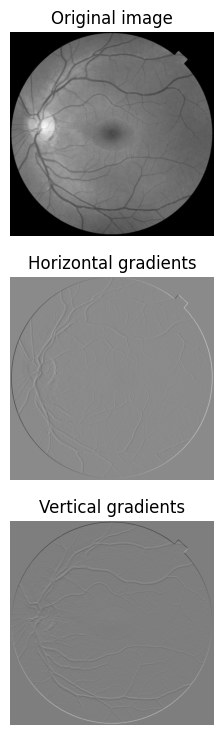

In [5]:
### Matplotlib incantations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

## Task 1. Design your code to compute diagonal gradient of the image used in the example and visualize it

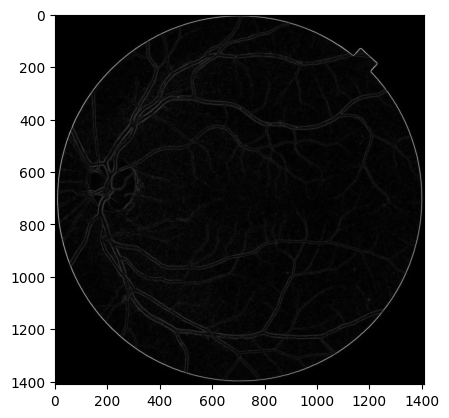

In [6]:
# write your code here
from skimage import filters
diagonal_gradient = filters.sobel(image)

plt.imshow(diagonal_gradient, cmap=plt.cm.gray)
plt.show()

## **Question 1**. Explain why we don't directly use the simplest image features (color or number of pixels)

**Answer to Q1**:

We don't use the most basic image properties directly, such as colour or pixel count, because they frequently lack the level of abstraction and discriminative power required to capture the rich and complex information present in photos.

While these basic attributes can provide some basic information about a picture, they are insufficient for many image analysis activities that require a more in-depth understanding of the visual content.

To overcome these limitations, advanced feature extraction techniques have been developed, such as edge detection, texture analysis, shape descriptors, deep learning-based features, and semantic representations.


---

## (Tutorial) HOG image features

In [7]:
# read image and convert it to grayscale
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

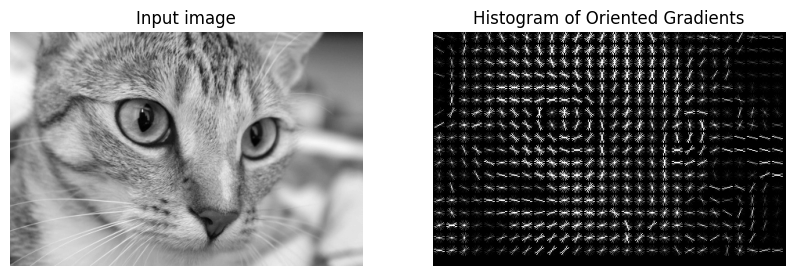

In [8]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## Task 2. ORB keypoints extraction and visualization
Apart from HOG image features, another popular image feature is ORB.<br>
Please extract keypoints from the image used in HOG example using on ORB features and visualize the keypoints on the original image

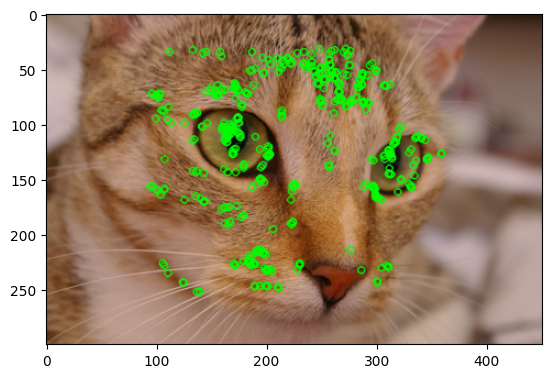

(<matplotlib.image.AxesImage at 0x7f22ace52c50>, None)

In [9]:
# write your code here
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

image = np.asarray(data.chelsea())
orb = cv.ORB_create()
kp = orb.detect(image,None)
kp, des = orb.compute(image, kp)
img2 = cv.drawKeypoints(image, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

## (Tutorial) Bag-of-Visual-Words
In the tutorial code, we create the code words only based on one image

In [10]:
# defining feature extractor that we want to use (ORB feature used in this extractor)
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [11]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [12]:
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
img = data.chelsea()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'The histogram of visual words')

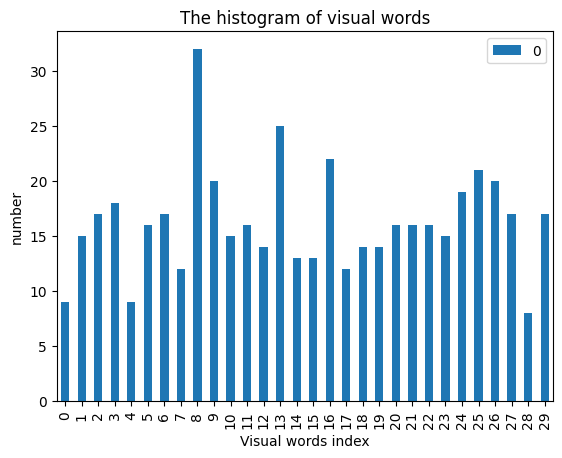

In [13]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Task 3. Bag-of-Visual-Words for multiple images
Create your bag-of-visual-words with 10 images and visualize the histogram of visual words. The 10 images belong to one category(dog, cat, bike, etc.)

In [14]:
# write your code here
imagess = []
imagess.append(data.brick())
imagess.append(data.camera())
imagess.append(data.cat())
imagess.append(data.moon())
imagess.append(data.coffee())
imagess.append(data.coins())
imagess.append(data.chelsea())
imagess.append(data.grass())
imagess.append(data.rocket())
imagess.append(data.logo())
imagess = np.array(imagess)

print(len(imagess))

10


<ipython-input-14-565a3a37ac0d>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imagess = np.array(imagess)


In [15]:
preprocessed_image = []

In [16]:
for index, imgg in enumerate(imagess):
  # Clustring the bag-of-visual-words by Kmeans method
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters = 30)
  kp, descriptor_list = features(imgg)
  kmeans.fit(descriptor_list)
  images = []
  images.append(imgg)
  for image in images:
        # image = gray(image)
        keypoint, descriptor = features(image)
        if (descriptor is not None):
            histogram = build_histogram(descriptor, kmeans)
            preprocessed_image.append(histogram)
  print(index)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9


Text(0.5, 1.0, 'The histogram of visual words of 10 Images At Once')

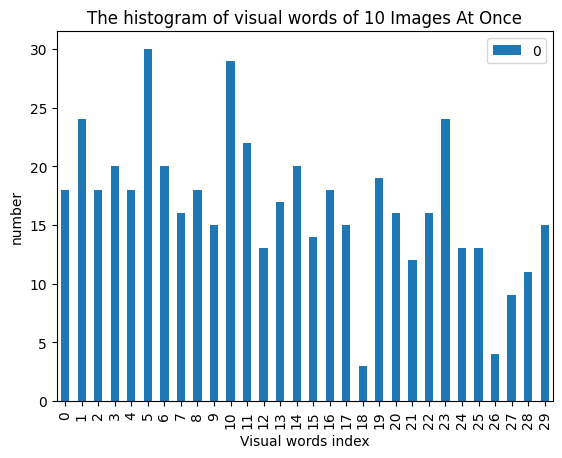

In [17]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words of 10 Images At Once')

## Question 2. Recall that the feature scaling does not have a large effect on classification accuracy (tf-idf). How about the effect of feature scaling in Bag-of-Visual-Words? Explain it.

**Answer to Q2**:

In contrast to the tf-idf representation, feature scaling can have some effect on classification accuracy in the Bag-of-Visual-Words format.

Feature scaling in BoVW refers to the process of normalising or standardising visual information extracted from photographs to constructing the bag-of-words histogram.


The BoVW representation becomes more reliable when feature scaling procedures such as normalisation or standardisation are used. However, the distribution and relative frequencies of visual words play a major role, rather than their absolute values.

---

## Question 3. What is the advantage of ORB(Oriented FAST and Rotated Brief) over SURF (Speeded up robust features). Explain briefly (Minimum of 10 words and maximum of 150 words)

**Answer to Q3**:

The advantage of ORB(Oriented FAST and Rotated Brief) over SURF (Speeded up robust features):

1. ORB's binary descriptor and quick feature identification make it ideal for real-time applications and resource-constrained contexts.
2. SURF, on the other hand, uses a Haar wavelet-based descriptor that is not intrinsically rotation invariant, necessitating additional calculations to ensure rotation invariance.
3. ORB is a popular choice among researchers and developers due to its accessibility and community support.
4. ORB uses a binary descriptor, which consumes less memory than SURF's floating-point descriptor.
5. ORB is designed to be noise resistant and can handle images with high noise levels.



ORB provides advantages over SURF in terms of computational efficiency, rotation invariance, open-source implementation, memory efficiency, and robustness to noise.

## Task 4. Extract text from image
Image file is given along with ICE-5-2.ipynb in canvas assignment .

Save it in drive and use get shareable link to everyone option . Image file name is **ExtractText4.jpeg**

Please extract the image from image file and print the text that you extracted.

In [18]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (5,127 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [20]:
!tesseract ExtractText4.jpeg output.txt

Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Estimating resolution as 185


In [21]:
# write your code here
!cat output.txt.txt

oc

Education is the
passport to the future,
for tomorrow belongs
to those who prepare

for it today.

Malcolm X


## Task 5. Design code to implement **ORB** using **OpenCV**. Please use a face image (Preferably your face image as its unique).

Keep your face image file name as **faceimg.jpg**
Save it in drive and use get shareable link to everyone option.

Please print the following during the implementation

* Training image and Testing image

* Number of Keypoints Detected In The Training Image (Not just number image too)

* Number of Keypoints Detected In The Query Image (Not just number image too)

* Number of Matching Keypoints Between The Training and Query Images (Not just number image too)



Downloading...
From: https://drive.google.com/uc?id=1TI8vBOSzZ-FryZO2LtMhV1Bw3uVhP5rO
To: /content/faceimg.jpg
100%|██████████| 16.1k/16.1k [00:00<00:00, 12.0MB/s]


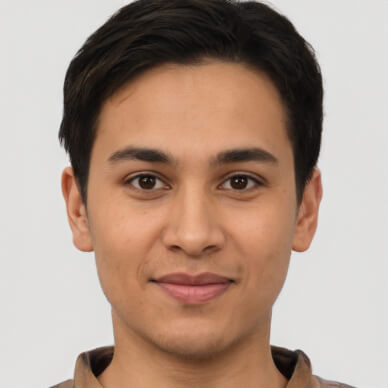

In [22]:
## Write your code here

from google.colab.patches import cv2_imshow
import cv2
import gdown

# Google Drive file URL
file_url = "https://drive.google.com/uc?id=1TI8vBOSzZ-FryZO2LtMhV1Bw3uVhP5rO"
# Download the image file from Google Drive
output_path = "faceimg.jpg"
gdown.download(file_url, output_path, quiet=False)
# Train Image
train_image = cv2.imread(output_path)
cv2_imshow(train_image)

Downloading...
From: https://drive.google.com/uc?id=1fA6AcPawtyG5y7E1n5Q0Ei6hRUcn428J
To: /content/faceimgtest.jpg
100%|██████████| 18.7k/18.7k [00:00<00:00, 58.8MB/s]


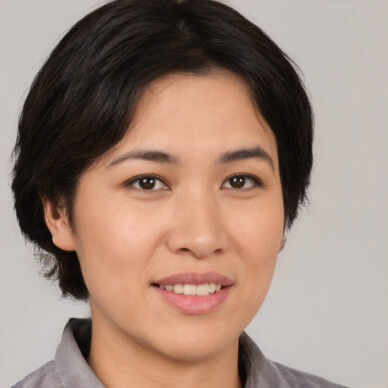

In [23]:
# Test/ Query Image
# Google Drive file URL
file_url = "https://drive.google.com/uc?id=1fA6AcPawtyG5y7E1n5Q0Ei6hRUcn428J"

# Download the image file from Google Drive
output_path = "faceimgtest.jpg"
gdown.download(file_url, output_path, quiet=False)
# Test Image
test_image = cv2.imread(output_path)
cv2_imshow(test_image)

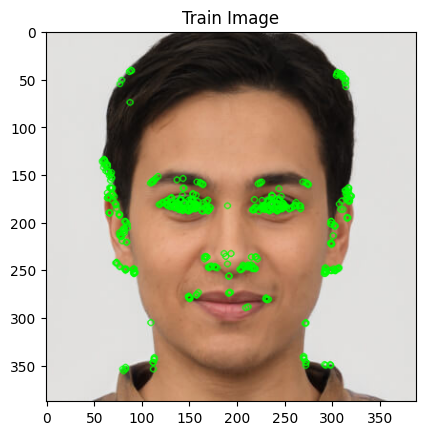

In [24]:
orb = cv2.ORB_create()
kp = orb.detect(train_image, None)
kp, des = orb.compute(train_image, kp)
nm_t = len(kp)
fmg = cv2.drawKeypoints(train_image, kp, None, color=(0,255,0), flags=0)
fmg = cv2.cvtColor(fmg, cv2.COLOR_BGR2RGB)
plt.imshow(fmg)
plt.title("Train Image")
plt.show()


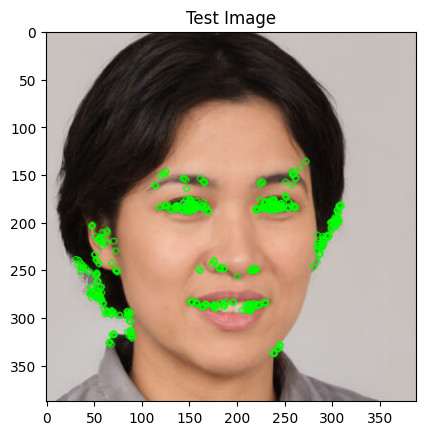

In [25]:
orb = cv.ORB_create()
kp = orb.detect(test_image, None)
kp, des = orb.compute(test_image, kp)
nm_te = len(kp)
fmg = cv.drawKeypoints(test_image, kp, None, color=(0,255,0), flags=0)
fmg = cv2.cvtColor(fmg, cv2.COLOR_BGR2RGB)
plt.imshow(fmg)
plt.title("Test Image")
plt.show()

In [26]:
print("Train Keypoints: {}".format(nm_t))
print("Test Keypoints: {}".format(nm_te))

Train Keypoints: 485
Test Keypoints: 485


# other method to complete the task

In [27]:
# Create an ORB object
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors for the training and query images
train_keypoints, train_descriptors = orb.detectAndCompute(train_image, None)
query_keypoints, query_descriptors = orb.detectAndCompute(test_image, None)

# Print the number of keypoints detected in the training and query images
print("Number of keypoints detected in the training image:", len(train_keypoints))
print("Number of keypoints detected in the query image:", len(query_keypoints))


# Create a brute-force matcher and perform keypoint matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(train_descriptors, query_descriptors)
matches = sorted(matches, key=lambda x: x.distance)

# Print the number of matching keypoints between the training and query images
print("Number of matching keypoints between the training and query images:", len(matches))

Number of keypoints detected in the training image: 485
Number of keypoints detected in the query image: 485
Number of matching keypoints between the training and query images: 144
